### Import libraries

In [51]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statistics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

### Pick and load one image from a directory

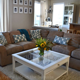

In [22]:
im=Image.open(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test\0.png",'r')
im

im= im.resize((80,80))
im

### Transform the list of pixels in a single image
example:

[210,111,212] ---> [233] [111] [212]


In [23]:

pix_val = list(im.getdata())
r_list=[]
g_list=[]
b_list=[]
for x in pix_val:
    for z in x:
        if z==x[0]:
            r_list.append(z)
        elif z==x[1]:
            g_list.append(z)
        elif z==x[2]:
            b_list.append(z)
            
#I've used a function of Image module called getdata() to extract the pixel values.
#This scans the image horizontally from left to right starting at the top-left corner. 
#The values got from each pixel is then added into a list. 
#Finally what we get is a list with each pixel value as a set of 4 values(R,G,B.A).

pix_val

[(204, 216, 224),
 (202, 207, 211),
 (190, 188, 187),
 (147, 145, 145),
 (169, 168, 163),
 (202, 203, 200),
 (155, 154, 152),
 (186, 187, 190),
 (168, 170, 172),
 (126, 124, 122),
 (137, 136, 134),
 (132, 127, 125),
 (119, 111, 107),
 (145, 148, 148),
 (119, 119, 122),
 (73, 74, 80),
 (147, 150, 159),
 (146, 141, 138),
 (112, 105, 98),
 (147, 149, 150),
 (81, 83, 85),
 (97, 100, 103),
 (146, 145, 142),
 (110, 103, 94),
 (136, 135, 134),
 (127, 127, 127),
 (127, 125, 126),
 (142, 138, 135),
 (104, 96, 88),
 (135, 132, 130),
 (134, 131, 129),
 (123, 120, 115),
 (101, 89, 80),
 (89, 78, 67),
 (111, 107, 100),
 (139, 138, 140),
 (116, 117, 120),
 (101, 102, 105),
 (95, 94, 95),
 (101, 98, 97),
 (127, 123, 117),
 (156, 152, 142),
 (150, 147, 136),
 (162, 155, 144),
 (173, 168, 156),
 (162, 155, 145),
 (148, 142, 131),
 (136, 128, 115),
 (115, 106, 89),
 (110, 97, 82),
 (105, 95, 82),
 (126, 117, 99),
 (131, 122, 107),
 (132, 126, 115),
 (133, 129, 120),
 (136, 130, 123),
 (135, 132, 128),
 

### Pick and load all the images from the directory and transform the list of pixels

In [8]:
size_x=80 # size
size_y=80 # size


reshaped_images_clean_train= [] #np.zeros((size_x,size_y,3))
reshaped_images_messy_train= []
reshaped_images_clean_val= []
reshaped_images_messy_val= []
reshaped_images_test= []
lists_xs_tot=[]
def load_images_from_folder(folder):
    images = []
    global size_x,size_y 
    for item in list_images:
        img_iterative = os.path.join(folder,item)
        for filename in os.listdir(img_iterative):    
            img = os.path.join(img_iterative,filename)
            if img is not None:      
                im=Image.open(img,'r')
                im=im.resize((size_x,size_y)) #size
                pix_val=list(im.getdata())
                print(pix_val)
                #print(np.array(pix_val).reshape((size_x,size_y,3)))
                #print(np.array(pix_val).reshape((size_x,size_y,3)).shape)
                r_list=[]
                g_list=[]
                b_list=[]  
                lists_xs=[]
                for x in pix_val:
                    list_x=list(x)
                    lists_xs.append(list_x)
                    for z in x:
                        if z==x[0]:
                            r_list.append(z)
                        elif z==x[1]:
                            g_list.append(z)
                        elif z==x[2]:
                            b_list.append(z) 
                np.array(lists_xs).reshape((size_x,size_y,3))            
                lists_xs_tot.append(lists_xs)
                rgb_list=r_list+g_list+b_list 
                reshaped_image=np.array(rgb_list).reshape((size_x,size_y,3)).tolist()
                rgb_list.insert(0,item)
                print(lists_xs)
                images.append(rgb_list) 
                #print(images)
                #used for CNNs
                if item=='clean_train':
                    reshaped_images_clean_train.append(reshaped_image)
                elif item=='messy_train': 
                    reshaped_images_messy_train.append(reshaped_image)
                elif item=='clean_val':
                    reshaped_images_clean_val.append(reshaped_image)
                elif  item=='messy_val':
                    reshaped_images_messy_val.append(reshaped_image)
                elif item =='test':
                    reshaped_images_test.append(reshaped_image)
                               
                
    return images,lists_xs
folder="C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy"

list_images=['clean_train','clean_val','messy_train','messy_val','test']
result=load_images_from_folder(folder)

print(x_val)

[(128, 102, 62), (114, 90, 56), (108, 82, 48), (103, 79, 45), (95, 74, 41), (93, 72, 42), (97, 76, 55), (114, 95, 77), (114, 99, 84), (117, 101, 87), (120, 105, 93), (121, 108, 97), (133, 115, 108), (228, 224, 222), (254, 254, 255), (253, 251, 253), (252, 252, 252), (249, 250, 251), (241, 244, 246), (246, 248, 250), (251, 252, 253), (231, 235, 236), (159, 172, 175), (189, 200, 208), (221, 231, 240), (219, 227, 236), (196, 206, 215), (186, 198, 206), (187, 190, 195), (140, 141, 143), (115, 118, 118), (129, 135, 134), (140, 144, 144), (129, 130, 128), (118, 118, 112), (121, 122, 118), (128, 131, 130), (130, 135, 132), (131, 135, 133), (134, 138, 137), (139, 143, 143), (141, 144, 143), (142, 144, 141), (140, 141, 136), (138, 139, 134), (138, 138, 133), (138, 138, 132), (139, 138, 133), (123, 118, 112), (96, 88, 78), (83, 73, 69), (82, 70, 62), (70, 57, 46), (67, 54, 42), (99, 89, 85), (174, 167, 174), (166, 160, 167), (164, 164, 166), (73, 60, 45), (78, 59, 36), (122, 114, 101), (171, 169

[(218, 168, 146), (215, 168, 146), (215, 168, 145), (215, 165, 144), (213, 162, 141), (211, 158, 137), (201, 149, 129), (201, 150, 129), (210, 161, 139), (216, 170, 146), (219, 173, 149), (220, 174, 150), (221, 175, 151), (222, 176, 153), (222, 177, 153), (225, 180, 161), (234, 193, 175), (237, 201, 182), (227, 194, 174), (217, 186, 168), (214, 181, 164), (212, 178, 167), (211, 180, 161), (220, 185, 156), (229, 189, 152), (232, 204, 172), (249, 241, 230), (254, 250, 245), (254, 247, 238), (253, 243, 225), (246, 216, 181), (239, 195, 152), (220, 188, 158), (211, 181, 165), (211, 179, 165), (210, 178, 165), (210, 178, 165), (211, 177, 165), (211, 177, 165), (211, 177, 165), (211, 177, 165), (211, 179, 166), (210, 178, 165), (210, 178, 165), (209, 177, 164), (210, 177, 162), (210, 177, 162), (210, 177, 160), (209, 177, 156), (208, 175, 157), (208, 175, 156), (208, 175, 156), (207, 175, 154), (207, 175, 154), (208, 174, 154), (209, 174, 154), (208, 173, 153), (230, 196, 168), (227, 187, 14

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[176, 173, 164], [177, 174, 165], [180, 176, 167], [180, 179, 170], [182, 181, 171], [183, 182, 171], [184, 182, 171], [186, 184, 172], [187, 185, 173], [187, 185, 173], [188, 186, 174], [187, 185, 172], [187, 185, 171], [188, 186, 172], [187, 185, 172], [187, 185, 170], [185, 182, 169], [181, 179, 170], [199, 199, 197], [204, 206, 205], [197, 197, 194], [191, 191, 185], [187, 185, 178], [179, 177, 167], [174, 172, 160], [174, 171, 160], [157, 156, 150], [83, 80, 95], [64, 60, 81], [56, 50, 72], [63, 58, 80], [69, 65, 90], [63, 58, 84], [119, 116, 123], [155, 151, 148], [74, 69, 87], [56, 51, 73], [52, 47, 69], [48, 43, 63], [48, 43, 63], [48, 43, 63], [49, 44, 64], [48, 43, 63], [46, 41, 61], [45, 41, 59], [56, 51, 70], [75, 74, 92], [52, 47, 68], [54, 47, 70], [56, 47, 71], [55, 51, 72], [56, 52, 73], [56, 50, 72], [56, 52, 74], [57, 55, 75], [58, 53, 75], [56, 52, 74], [54, 52, 74], [142, 128, 116], [201, 182, 144], [206, 187, 146], [131, 120, 112], [53, 50, 74], [64, 61, 84], [66,

[[232, 224, 211], [233, 226, 209], [233, 226, 210], [232, 225, 209], [232, 225, 209], [231, 223, 207], [231, 222, 207], [231, 222, 207], [231, 221, 206], [230, 221, 205], [230, 221, 204], [230, 221, 204], [229, 219, 202], [229, 219, 202], [229, 220, 203], [229, 219, 202], [227, 218, 201], [227, 218, 201], [227, 218, 201], [226, 217, 200], [227, 217, 200], [225, 216, 199], [225, 216, 199], [226, 217, 199], [227, 219, 200], [226, 218, 199], [227, 216, 198], [227, 216, 198], [225, 213, 196], [222, 214, 195], [222, 214, 195], [222, 214, 195], [222, 214, 195], [222, 214, 195], [222, 214, 195], [221, 213, 194], [219, 212, 191], [220, 212, 196], [220, 213, 196], [218, 211, 187], [220, 213, 188], [220, 213, 187], [220, 213, 187], [220, 213, 186], [219, 212, 185], [217, 210, 184], [219, 209, 184], [219, 208, 183], [218, 206, 182], [217, 205, 181], [216, 204, 180], [214, 203, 178], [215, 201, 180], [214, 200, 178], [214, 200, 177], [213, 197, 176], [210, 196, 177], [209, 196, 177], [209, 195, 17

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[172, 156, 143], [172, 156, 143], [172, 156, 143], [171, 155, 142], [172, 156, 143], [171, 156, 143], [170, 156, 143], [171, 157, 143], [171, 157, 143], [170, 156, 143], [170, 156, 143], [171, 157, 143], [171, 157, 143], [170, 156, 143], [169, 155, 146], [168, 154, 145], [168, 154, 142], [167, 153, 139], [166, 152, 139], [165, 151, 138], [165, 151, 138], [162, 148, 135], [161, 147, 134], [161, 147, 134], [168, 154, 141], [175, 161, 148], [174, 161, 148], [172, 163, 148], [172, 163, 149], [170, 160, 149], [164, 150, 134], [166, 152, 135], [167, 155, 137], [169, 156, 141], [171, 157, 144], [169, 158, 146], [166, 157, 145], [163, 154, 140], [162, 153, 138], [159, 150, 135], [159, 150, 135], [159, 150, 135], [157, 148, 133], [156, 148, 132], [155, 146, 131], [155, 146, 131], [154, 145, 130], [153, 144, 128], [152, 143, 128], [152, 143, 127], [152, 143, 126], [152, 143, 126], [154, 145, 129], [153, 144, 129], [146, 136, 122], [142, 133, 123], [139, 135, 126], [139, 135, 124], [141, 137, 12

NameError: name 'x_val' is not defined

### Load the dataset as a dataframe

In [11]:
import pandas as pd
dataset=pd.DataFrame(result)

In [12]:
dataset

0      1      2      3      4      5      6      7      8      \
0    clean_train    128    114    108    103     95     93     97    114   
1    clean_train    178    177    178    180    180    181    182    182   
2    clean_train    216    218    224    225    213    188    181    210   
3    clean_train    218    215    215    215    213    211    201    201   
4    clean_train    150    155    158    161    161    161    163    163   
..           ...    ...    ...    ...    ...    ...    ...    ...    ...   
217         test    210    211    212    212    213    213    213    213   
218         test    191    189    189    189    188    188    185    186   
219         test    120     94     91     83    147    147     99    103   
220         test    173    171    168    163    160    156    152    148   
221         test    255    255    255    255    255    255    255    255   

     9      ...  19191  19192  19193  19194  19195  19196  19197  19198  \
0      114  ...     40     31     27     26     28     30     34     42   
1      182  ...     86     96     81     64    117    132    122    110   
2      229  ...     95     98     96     94     84     78     86     82   
3      210  ...     54     56     56     58     52     54     55     50   
4      166  ...     12     10     10      9      8      7      7      7   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
217    214  ...    131    140    149    149    154     84     21     20   
218    186  ...    199    210    215    217    218    240    248    250   
219    105  ...      2      1      4     11     15     19     24     26   
220    148  ...     26     32     33     29     35     28     25     21   
221    255  ...     44     46     52     54     59     57     58     64   

     19199  19200  
0       40     40  
1      111    124  
2       86     87  
3       53     55  
4        7      6  
..     ...    ...  
217    123    157  
218    252    254  
219     29     35  
220     29     33  
221     66     67  

[222 rows x 19201 columns]

### Save the dataset

In [13]:
dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\raw_dataset_80pix.pkl")

### Data Preprocessing

In [14]:
clean_train=dataset[dataset[0]=='clean_train']
clean_val=dataset[dataset[0]=='clean_val']
messy_train=dataset[dataset[0]=='messy_train']
messy_val=dataset[dataset[0]=='messy_val']
test=dataset[dataset[0]=='test']
train_dataset=pd.concat([clean_train,messy_train])
val_dataset=pd.concat([clean_val,messy_val])
test_dataset=pd.DataFrame(test)
train_dataset.replace('clean_train','clean',inplace=True)
train_dataset.replace('messy_train','messy',inplace=True)
val_dataset.replace('clean_val','clean',inplace=True)
val_dataset.replace('messy_val','messy',inplace=True)
test_dataset.replace('clean_val','clean',inplace=True)
test_dataset.replace('messy_val','messy',inplace=True)
test_dataset.iloc[: , 0]=test_dataset.iloc[: , 0].astype(str)
train_dataset.iloc[: , 0]=train_dataset.iloc[: , 0].astype(str)
val_dataset.iloc[: , 0]=val_dataset.iloc[: , 0].astype(str)
train_dataset.dtypes

0        object
1         int64
2         int64
3         int64
4         int64
          ...  
19196     int64
19197     int64
19198     int64
19199     int64
19200     int64
Length: 19201, dtype: object

In [15]:
train_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\train_dataset_raw_80pix.csv")
val_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\val_dataset_raw_80pix.csv")
test_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test_dataset_raw_80pix.csv")

In [16]:
size=(len(train_dataset.columns)-1)/3
rgb=('Red','Green','Blue')
columns=[]
for colour in rgb:
    for num in range(1,int(size+1)):
        if colour=='Red'and num==1:
            columns.append(('label', num))
        columns.append((colour, num))
train_dataset.columns = pd.MultiIndex.from_tuples(columns, names=['Variables','Number'])
val_dataset.columns = pd.MultiIndex.from_tuples(columns, names=['Variables','Number'])
test_dataset.columns = pd.MultiIndex.from_tuples(columns, names=['Variables','Number'])
train_dataset['label']=train_dataset['label'].astype(str)
train_dataset['Red']=train_dataset['Red'].astype('int')
train_dataset['Blue']=train_dataset['Blue'].astype('int')
train_dataset['Green']=train_dataset['Green'].astype('int')
train_dataset

Variables  label  Red                                          ... Blue       \
Number      1    1    2    3    4    5    6    7    8    9     ... 6391 6392   
0          clean  128  114  108  103   95   93   97  114  114  ...   40   31   
1          clean  178  177  178  180  180  181  182  182  182  ...   86   96   
2          clean  216  218  224  225  213  188  181  210  229  ...   95   98   
3          clean  218  215  215  215  213  211  201  201  210  ...   54   56   
4          clean  150  155  158  161  161  161  163  163  166  ...   12   10   
..           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
197        messy  171  166  168  171  172  175  174  172  168  ...  110  109   
198        messy   30  107  107  157  204  227  218  218  222  ...  222  222   
199        messy  214  230  189  150  154  156  158  159  159  ...  177  159   
200        messy   57   62   68   76   86   96  109  122  134  ...  232  168   
201        messy   94   62   62   27   20   21   20   21   20  ...    5    6   

Variables                                          
Number    6393 6394 6395 6396 6397 6398 6399 6400  
0           27   26   28   30   34   42   40   40  
1           81   64  117  132  122  110  111  124  
2           96   94   84   78   86   82   86   87  
3           56   58   52   54   55   50   53   55  
4           10    9    8    7    7    7    7    6  
..         ...  ...  ...  ...  ...  ...  ...  ...  
197        109  108  106  105  105  101   94   63  
198        222  221  222  220  219  222  223  223  
199        151   92   95  103   93   95   63   41  
200         17   78  188  178  123   79   76  101  
201          7    7    7   13    8    8   10   15  

[192 rows x 19201 columns]

### Save the final dataset

In [17]:
train_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\train_dataset_80pix.csv")
val_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\val_dataset_80pix.csv")
test_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test_dataset_80pix.csv")

### Read the final dataset

In [25]:
train_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\train_dataset_80pix.csv")
val_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\val_dataset_80pix.csv")
test_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test_dataset_80pix.csv")

In [26]:
train_dataset

Variables  label  Red                                          ... Blue       \
Number      1    1    2    3    4    5    6    7    8    9     ... 6391 6392   
0          clean  128  114  108  103   95   93   97  114  114  ...   40   31   
1          clean  178  177  178  180  180  181  182  182  182  ...   86   96   
2          clean  216  218  224  225  213  188  181  210  229  ...   95   98   
3          clean  218  215  215  215  213  211  201  201  210  ...   54   56   
4          clean  150  155  158  161  161  161  163  163  166  ...   12   10   
..           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
197        messy  171  166  168  171  172  175  174  172  168  ...  110  109   
198        messy   30  107  107  157  204  227  218  218  222  ...  222  222   
199        messy  214  230  189  150  154  156  158  159  159  ...  177  159   
200        messy   57   62   68   76   86   96  109  122  134  ...  232  168   
201        messy   94   62   62   27   20   21   20   21   20  ...    5    6   

Variables                                          
Number    6393 6394 6395 6396 6397 6398 6399 6400  
0           27   26   28   30   34   42   40   40  
1           81   64  117  132  122  110  111  124  
2           96   94   84   78   86   82   86   87  
3           56   58   52   54   55   50   53   55  
4           10    9    8    7    7    7    7    6  
..         ...  ...  ...  ...  ...  ...  ...  ...  
197        109  108  106  105  105  101   94   63  
198        222  221  222  220  219  222  223  223  
199        151   92   95  103   93   95   63   41  
200         17   78  188  178  123   79   76  101  
201          7    7    7   13    8    8   10   15  

[192 rows x 19201 columns]

### PCA

In [20]:
train_dataset['label']=train_dataset['label'].replace('clean',1)#,inplace=True)
train_dataset['label']=train_dataset['label'].replace('messy',0)#,inplace=True)
train_dataset 
val_dataset['label']=val_dataset['label'].replace('clean',1)
val_dataset['label']=val_dataset['label'].replace('messy',0)

test_dataset['label']=test_dataset['label'].replace('clean',1)#,inplace=True)
test_dataset['label']=test_dataset['label'].replace('messy',0)#,inplace=True)


cat_encoder=OneHotEncoder()
cat_features_1hot=cat_encoder.fit_transform(train_dataset['label'])#.to_array()


scaler=StandardScaler()
train_dataset_x=scaler.fit_transform(train_dataset.iloc[:,1:])
val_dataset_x=scaler.fit_transform(val_dataset.iloc[:,1:])
test_dataset_x=scaler.fit_transform(test_dataset.iloc[:,1:])

#  another way to compute pca
pca = PCA(n_components=0.99) 
train_dataset_pca = pca.fit_transform(train_dataset_x)
input_shape=train_dataset_pca.shape[1]
val_dataset_pca = pca.transform(val_dataset_x)
pca.singular_values_

array([836.98514569, 508.60351496, 401.81170041, 280.21720154,
       263.72876277, 246.76241517, 208.86351309, 205.59420868,
       196.2441996 , 187.12171753, 185.38086605, 182.85428859,
       179.22713249, 177.07505322, 175.580235  , 172.27167149,
       171.91258875, 170.69348214, 166.78684515, 166.27927743,
       165.37969595, 164.23202757, 159.70436669, 159.34399819,
       157.8756651 , 157.41870686, 155.31152746, 152.34227728,
       151.85510261, 149.79634968, 149.21818743, 148.3671544 ,
       147.99462868, 145.03265277, 143.95250959, 143.31541493,
       142.70910949, 141.63246273, 139.23190198, 138.02627607,
       137.82631531, 136.43462271, 135.62295653, 133.71010442,
       133.23934816, 132.93572947, 132.0787505 , 131.19407613,
       130.0200841 , 129.85752844, 129.06896751, 128.10693754,
       127.41953904, 126.44046013, 125.22888729, 124.53249329,
       124.13406867, 122.94989042, 122.54360855, 122.00786309,
       121.73185835, 121.56470853, 120.90992185, 120.79

In [21]:
train_dataset_pca

array([[ 18.79784449,  22.415972  , -34.08533893, ...,  -1.71397785,
         -0.15925472,  -3.89441203],
       [ 66.31751955, -24.99239939,  24.8431225 , ...,  -2.52248894,
          1.03287473,  -3.10862443],
       [ 99.83881322, -16.6039771 ,  -5.65114622, ...,  -0.7171416 ,
        -19.81795912,   0.13591268],
       ...,
       [ 22.39726382, -86.26613387,  21.45265396, ...,   2.00489229,
          1.02020477,   1.04650375],
       [-56.30599324,  36.12239454,   4.60612647, ...,  -2.87061528,
          0.42122092,   0.55511004],
       [-66.24624191, -18.63178231,  33.18218612, ...,   2.40754338,
         -1.41805295,   0.61719946]])

### Train the model and predict the test images with an ANN


In [22]:
tf.random.set_seed(79)
opt = keras.optimizers.Adam(learning_rate=0.0000004, beta_1=0.8,beta_2=0.999)
model=keras.models.Sequential([keras.layers.Flatten(input_shape=[input_shape,1]),
                               keras.layers.BatchNormalization(),
                               keras.layers.Dropout(rate=0.2),
                               keras.layers.Dense(6000,activation='elu'
                                                  ,kernel_initializer='glorot_normal'
                                                 #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                 ),
                               #keras.layers.BatchNormalization(),
                               keras.layers.Dropout(rate=0.15),
                               keras.layers.Dense(1000,activation='elu'
                                                  ,kernel_initializer='GlorotNormal'
                                               #  ,kernel_regularizer=keras.regularizers.l2(0.02)
                                                 ),
                               keras.layers.BatchNormalization(),
                               keras.layers.Dropout(rate=0.05),
                               keras.layers.Dense(32,activation='elu'
                                                  ,kernel_initializer='glorot_normal'
                                                 #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                 ),
                               #keras.layers.BatchNormalization(),
                               #keras.layers.Dropout(rate=0.21),
                               keras.layers.Dense(1,activation='sigmoid')])
model.summary()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
root_logdir=os.path.join(os.curdir,'my_logs')
def get_run_logdir():
    run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)
run_logdir=get_run_logdir()
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=358,restore_best_weights=True)
history=model.fit(np.asarray(train_dataset_pca).reshape(train_dataset_pca.shape),
np.asarray(train_dataset.loc[:,'label']).reshape(train_dataset.loc[:,'label'].shape),
epochs=30900,validation_data=(np.asarray(val_dataset_pca).reshape(val_dataset_pca.shape),np.asarray(val_dataset.loc[:,'label']).reshape(val_dataset.loc[:,'label'].shape)),
                 callbacks=[tensorboard_cb,early_stopping_cb])

callbacks=[early_stopping_cb]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 182)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 182)               728       
_________________________________________________________________
dropout (Dropout)            (None, 182)               0         
_________________________________________________________________
dense (Dense)                (None, 6000)              1098000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 6000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              6001000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4

Epoch 47/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.5990 - val_loss: 0.6504 - val_accuracy: 0.6500
Epoch 48/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.7233 - accuracy: 0.5885 - val_loss: 0.6489 - val_accuracy: 0.6500
Epoch 49/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5990 - val_loss: 0.6474 - val_accuracy: 0.6500
Epoch 50/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.7375 - accuracy: 0.5938 - val_loss: 0.6463 - val_accuracy: 0.6500
Epoch 51/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.7249 - accuracy: 0.5833 - val_loss: 0.6449 - val_accuracy: 0.6500
Epoch 52/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.6771 - accuracy: 0.6719 - val_loss: 0.6436 - val_accuracy: 0.6500
Epoch 53/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.6146 - val_loss: 0.6423 - val_accuracy: 0.6500
Epoch 

6/6 [==============================] - 0s 7ms/step - loss: 0.3841 - accuracy: 0.8594 - val_loss: 0.5663 - val_accuracy: 0.6500
Epoch 162/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.4293 - accuracy: 0.7865 - val_loss: 0.5661 - val_accuracy: 0.6500
Epoch 163/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.8750 - val_loss: 0.5658 - val_accuracy: 0.6500
Epoch 164/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3756 - accuracy: 0.8594 - val_loss: 0.5654 - val_accuracy: 0.6500
Epoch 165/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3904 - accuracy: 0.8438 - val_loss: 0.5653 - val_accuracy: 0.6500
Epoch 166/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3815 - accuracy: 0.8281 - val_loss: 0.5644 - val_accuracy: 0.6500
Epoch 167/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3867 - accuracy: 0.8438 - val_loss: 0.5637 - val_accuracy: 0.6500
Epoch 168/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.2530 - accuracy: 0.9219 - val_loss: 0.5497 - val_accuracy: 0.7000
Epoch 276/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2728 - accuracy: 0.9323 - val_loss: 0.5498 - val_accuracy: 0.7000
Epoch 277/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2463 - accuracy: 0.9323 - val_loss: 0.5498 - val_accuracy: 0.7000
Epoch 278/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2455 - accuracy: 0.9479 - val_loss: 0.5496 - val_accuracy: 0.7000
Epoch 279/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2776 - accuracy: 0.9010 - val_loss: 0.5495 - val_accuracy: 0.7000
Epoch 280/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2714 - accuracy: 0.9062 - val_loss: 0.5500 - val_accuracy: 0.7000
Epoch 281/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2977 - accuracy: 0.9062 - val_loss: 0.5503 - val_accuracy: 0.7000
Epoch 282/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.2090 - accuracy: 0.9479 - val_loss: 0.5538 - val_accuracy: 0.8000
Epoch 390/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1947 - accuracy: 0.9323 - val_loss: 0.5533 - val_accuracy: 0.8000
Epoch 391/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2220 - accuracy: 0.9375 - val_loss: 0.5530 - val_accuracy: 0.8000
Epoch 392/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1819 - accuracy: 0.9583 - val_loss: 0.5528 - val_accuracy: 0.8000
Epoch 393/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2106 - accuracy: 0.9479 - val_loss: 0.5527 - val_accuracy: 0.8000
Epoch 394/30900
6/6 [==============================] - 0s 6ms/step - loss: 0.1926 - accuracy: 0.9479 - val_loss: 0.5530 - val_accuracy: 0.8000
Epoch 395/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1851 - accuracy: 0.9583 - val_loss: 0.5527 - val_accuracy: 0.8000
Epoch 396/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.1408 - accuracy: 0.9740 - val_loss: 0.5657 - val_accuracy: 0.8000
Epoch 504/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1390 - accuracy: 0.9792 - val_loss: 0.5658 - val_accuracy: 0.8000
Epoch 505/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1497 - accuracy: 0.9635 - val_loss: 0.5658 - val_accuracy: 0.8000
Epoch 506/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1371 - accuracy: 0.9896 - val_loss: 0.5655 - val_accuracy: 0.8000
Epoch 507/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1432 - accuracy: 0.9635 - val_loss: 0.5655 - val_accuracy: 0.8000
Epoch 508/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1630 - accuracy: 0.9635 - val_loss: 0.5653 - val_accuracy: 0.8000
Epoch 509/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1542 - accuracy: 0.9740 - val_loss: 0.5659 - val_accuracy: 0.8000
Epoch 510/30900

(0.0, 1.0)

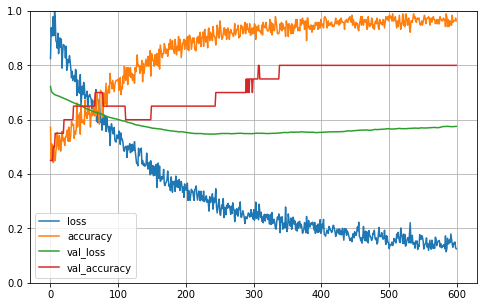

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.gca().set_ylim(0,1)

### Train the model with a CNN

In [45]:
tf.random.set_seed(79)

train_reshaped=reshaped_images_clean_train+ reshaped_images_messy_train
train_reshaped=np.array(train_reshaped)/255 #.div(255)

#model = tf.keras.applications.DenseNet169(include_top=True,weights=None,input_shape=(35,35,3),classes=1)
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(8, (3,3), activation='linear', input_shape=(80,80, 3)),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3)),#activation='linear'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    #tf.keras.layers.Conv2D(16, (3,3), activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    #tf.keras.layers.Dropout(rate=0.05),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),  activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(32, (3,3), activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='linear'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1522, activation='elu',kernel_initializer='glorot_normal'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.Dense(48, activation='elu',kernel_initializer='glorot_normal'),
    #tf.keras.layers.Dropout(rate=0.05),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
      ])


'''import os
root_logdir=os.path.join(os.curdir,'my_logs')
def get_run_logdir():
    import time
    run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)
run_logdir=get_run_logdir()
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)'''
val_reshaped=reshaped_images_clean_val+ reshaped_images_messy_val
opt = keras.optimizers.Adam(learning_rate=0.000063)
val_reshaped=np.array(val_reshaped)/255 #.div(255)
a=np.array([0 for x in range(0, len(reshaped_images_clean_train))]+[1 for x in range(0, len(reshaped_images_messy_train))])
b=np.array([0 for x in range(0, len(reshaped_images_clean_val))]+[1 for x in range(0, len(reshaped_images_messy_val))])
c=train_reshaped.reshape(train_reshaped.shape)
d=val_reshaped.reshape(val_reshaped.shape)

    #checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=158,restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history=model.fit(c,a.reshape(a.shape),epochs=7000,validation_data=(d,b.reshape(b.shape)),
callbacks=[early_stopping_cb])
model.summary()
#pd.set_option('display.max_rows', 10)

Epoch 1/7000
6/6 [==============================] - 1s 80ms/step - loss: 0.7220 - accuracy: 0.4844 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 2/7000
6/6 [==============================] - 0s 39ms/step - loss: 0.6343 - accuracy: 0.5990 - val_loss: 0.5771 - val_accuracy: 0.7000
Epoch 3/7000
6/6 [==============================] - 0s 18ms/step - loss: 0.5633 - accuracy: 0.7083 - val_loss: 0.5514 - val_accuracy: 0.7500
Epoch 4/7000
6/6 [==============================] - 0s 18ms/step - loss: 0.5406 - accuracy: 0.7344 - val_loss: 0.5432 - val_accuracy: 0.7000
Epoch 5/7000
6/6 [==============================] - 0s 19ms/step - loss: 0.5014 - accuracy: 0.7760 - val_loss: 0.5403 - val_accuracy: 0.7500
Epoch 6/7000
6/6 [==============================] - 0s 19ms/step - loss: 0.4910 - accuracy: 0.7760 - val_loss: 0.5277 - val_accuracy: 0.7000
Epoch 7/7000
6/6 [==============================] - 0s 22ms/step - loss: 0.4750 - accuracy: 0.8021 - val_loss: 0.5238 - val_accuracy: 0.7000
Epoch 8/7000


Epoch 59/7000
6/6 [==============================] - 0s 16ms/step - loss: 0.0657 - accuracy: 1.0000 - val_loss: 0.3809 - val_accuracy: 0.8000
Epoch 60/7000
6/6 [==============================] - 0s 17ms/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.8500
Epoch 61/7000
6/6 [==============================] - 0s 16ms/step - loss: 0.0602 - accuracy: 1.0000 - val_loss: 0.3793 - val_accuracy: 0.8000
Epoch 62/7000
6/6 [==============================] - 0s 17ms/step - loss: 0.0603 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.8500
Epoch 63/7000
6/6 [==============================] - 0s 17ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 0.3821 - val_accuracy: 0.8500
Epoch 64/7000
6/6 [==============================] - 0s 17ms/step - loss: 0.0509 - accuracy: 1.0000 - val_loss: 0.3879 - val_accuracy: 0.8500
Epoch 65/7000
6/6 [==============================] - 0s 17ms/step - loss: 0.0480 - accuracy: 1.0000 - val_loss: 0.3853 - val_accuracy: 0.8000
Epoch 

6/6 [==============================] - 0s 17ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.5166 - val_accuracy: 0.8500
Epoch 174/7000
6/6 [==============================] - 0s 17ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5188 - val_accuracy: 0.8500
Epoch 175/7000
6/6 [==============================] - 0s 17ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.5268 - val_accuracy: 0.8500
Epoch 176/7000
6/6 [==============================] - 0s 17ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.5224 - val_accuracy: 0.8500
Epoch 177/7000
6/6 [==============================] - 0s 16ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5242 - val_accuracy: 0.8500
Epoch 178/7000
6/6 [==============================] - 0s 16ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5236 - val_accuracy: 0.8500
Epoch 179/7000
6/6 [==============================] - 0s 18ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.5248 - val_accuracy: 0.8500
Epoch 180/7000

(0.0, 1.0)

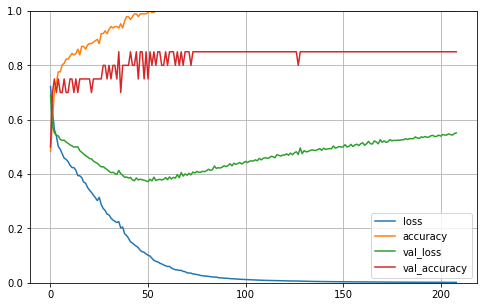

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_xlim(0,29)
plt.gca().set_ylim(0,1)
#model.save('my_keras_model11.h5')

### Details about the CNN

In [30]:
model=keras.models.load_model('my_keras_model10.h5') 

model.summary()

for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(model.layers[i].get_config())
#info about optimizers
model.optimizer.get_config()       


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 78, 78, 8)         224       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 39, 39, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 16)        1168      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)             

{'name': 'Adam',
 'learning_rate': 6.3e-05,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [ ]:
plt.savefig('results/model10.png',bbox_inches='tight')

### Train the model with a CNN with augmented images

In [23]:
size=130
TRAINING_DIR = os.path.join('C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy','training')
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=3,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   batch_size=40,
                                                   class_mode='binary',
                                                   target_size=(size,size))

VALIDATION_DIR = os.path.join('C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy', 'validation')
validation_datagen = ImageDataGenerator(rescale=1/255)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size=40,
                                                             class_mode='binary',
                                                             target_size=(size,size))



Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [44]:
tf.random.set_seed(79)

#model = tf.keras.applications.DenseNet169(include_top=True,weights=None,input_shape=(35,35,3),classes=1)
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='linear', input_shape=(size,size, 3)),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3)),#activation='linear'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),  activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(32, (3,3), activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='linear'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1522, activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.Dense(45, activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
      ])



opt = keras.optimizers.Adam(learning_rate=0.000023)
#val_reshaped=np.array(val_reshaped)/255 #.div(255)
#a=np.array([0 for x in range(0, len(reshaped_images_clean_train))]+[1 for x in range(0, len(reshaped_images_messy_train))])
#b=np.array([0 for x in range(0, len(reshaped_images_clean_val))]+[1 for x in range(0, len(reshaped_images_messy_val))])
#c=train_reshaped.reshape(train_reshaped.shape)
#d=val_reshaped.reshape(val_reshaped.shape)

    #checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=190,restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#history=model.fit(c,a.reshape(a.shape),epochs=7000,validation_data=(d,b.reshape(b.shape)),

model.summary()
#pd.set_option('display.max_rows', 10)

history = model.fit_generator(train_generator,
                              epochs=7000,
                              verbose=1,
                              validation_data=validation_generator,callbacks=[early_stopping_cb])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 62, 62, 32)        4640      
_________________________________________________________________
activation_17 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 14, 14, 64)      

Epoch 44/7000
5/5 [==============================] - 2s 268ms/step - loss: 0.4141 - accuracy: 0.8281 - val_loss: 0.4472 - val_accuracy: 0.8000
Epoch 45/7000
5/5 [==============================] - 2s 294ms/step - loss: 0.3941 - accuracy: 0.8438 - val_loss: 0.5771 - val_accuracy: 0.7000
Epoch 46/7000
5/5 [==============================] - 2s 419ms/step - loss: 0.3838 - accuracy: 0.8542 - val_loss: 0.4456 - val_accuracy: 0.8000
Epoch 47/7000
5/5 [==============================] - 2s 285ms/step - loss: 0.3879 - accuracy: 0.8542 - val_loss: 0.4384 - val_accuracy: 0.8000
Epoch 48/7000
5/5 [==============================] - 2s 282ms/step - loss: 0.3962 - accuracy: 0.8177 - val_loss: 0.5257 - val_accuracy: 0.8000
Epoch 49/7000
5/5 [==============================] - 1s 278ms/step - loss: 0.3880 - accuracy: 0.8542 - val_loss: 0.4345 - val_accuracy: 0.8000
Epoch 50/7000
5/5 [==============================] - 2s 243ms/step - loss: 0.3963 - accuracy: 0.8385 - val_loss: 0.4552 - val_accuracy: 0.8000

Epoch 158/7000
5/5 [==============================] - 2s 318ms/step - loss: 0.3838 - accuracy: 0.8333 - val_loss: 0.4123 - val_accuracy: 0.8500
Epoch 159/7000
5/5 [==============================] - 2s 301ms/step - loss: 0.3224 - accuracy: 0.8646 - val_loss: 0.4794 - val_accuracy: 0.8000
Epoch 160/7000
5/5 [==============================] - 2s 330ms/step - loss: 0.3179 - accuracy: 0.8698 - val_loss: 0.3795 - val_accuracy: 0.8500
Epoch 161/7000
5/5 [==============================] - 1s 290ms/step - loss: 0.3162 - accuracy: 0.8698 - val_loss: 0.4187 - val_accuracy: 0.8500
Epoch 162/7000
5/5 [==============================] - 2s 271ms/step - loss: 0.3432 - accuracy: 0.8333 - val_loss: 0.4421 - val_accuracy: 0.8500
Epoch 163/7000
5/5 [==============================] - 2s 307ms/step - loss: 0.3190 - accuracy: 0.8646 - val_loss: 0.4338 - val_accuracy: 0.8500
Epoch 164/7000
5/5 [==============================] - 2s 300ms/step - loss: 0.3189 - accuracy: 0.8594 - val_loss: 0.3893 - val_accuracy:

Epoch 215/7000
5/5 [==============================] - 2s 263ms/step - loss: 0.2999 - accuracy: 0.8750 - val_loss: 0.3402 - val_accuracy: 0.9000
Epoch 216/7000
5/5 [==============================] - 1s 283ms/step - loss: 0.3093 - accuracy: 0.8542 - val_loss: 0.4848 - val_accuracy: 0.8000
Epoch 217/7000
5/5 [==============================] - 2s 279ms/step - loss: 0.2791 - accuracy: 0.8906 - val_loss: 0.4025 - val_accuracy: 0.8500
Epoch 218/7000
5/5 [==============================] - 2s 306ms/step - loss: 0.2946 - accuracy: 0.8802 - val_loss: 0.4015 - val_accuracy: 0.8500
Epoch 219/7000
5/5 [==============================] - 2s 349ms/step - loss: 0.2726 - accuracy: 0.8906 - val_loss: 0.4601 - val_accuracy: 0.8500
Epoch 220/7000
5/5 [==============================] - 1s 289ms/step - loss: 0.3028 - accuracy: 0.8854 - val_loss: 0.4546 - val_accuracy: 0.8500
Epoch 221/7000
5/5 [==============================] - 2s 291ms/step - loss: 0.2745 - accuracy: 0.9010 - val_loss: 0.3753 - val_accuracy:

Epoch 272/7000
5/5 [==============================] - 2s 315ms/step - loss: 0.2661 - accuracy: 0.8802 - val_loss: 0.4654 - val_accuracy: 0.7500
Epoch 273/7000
5/5 [==============================] - 2s 291ms/step - loss: 0.2818 - accuracy: 0.8750 - val_loss: 0.4822 - val_accuracy: 0.7500
Epoch 274/7000
5/5 [==============================] - 2s 321ms/step - loss: 0.3153 - accuracy: 0.8698 - val_loss: 0.4075 - val_accuracy: 0.9000
Epoch 275/7000
5/5 [==============================] - 1s 266ms/step - loss: 0.3024 - accuracy: 0.8802 - val_loss: 0.4227 - val_accuracy: 0.9000
Epoch 276/7000
5/5 [==============================] - 2s 290ms/step - loss: 0.2894 - accuracy: 0.8646 - val_loss: 0.4844 - val_accuracy: 0.7500
Epoch 277/7000
5/5 [==============================] - 2s 343ms/step - loss: 0.2598 - accuracy: 0.9010 - val_loss: 0.3355 - val_accuracy: 0.9000
Epoch 278/7000
5/5 [==============================] - 2s 300ms/step - loss: 0.2996 - accuracy: 0.8698 - val_loss: 0.4334 - val_accuracy:

Epoch 329/7000
5/5 [==============================] - 1s 271ms/step - loss: 0.2519 - accuracy: 0.9062 - val_loss: 0.3984 - val_accuracy: 0.9000
Epoch 330/7000
5/5 [==============================] - 1s 300ms/step - loss: 0.2916 - accuracy: 0.8854 - val_loss: 0.3908 - val_accuracy: 0.9000
Epoch 331/7000
5/5 [==============================] - 1s 280ms/step - loss: 0.2608 - accuracy: 0.9219 - val_loss: 0.5155 - val_accuracy: 0.7500
Epoch 332/7000
5/5 [==============================] - 2s 309ms/step - loss: 0.2672 - accuracy: 0.8854 - val_loss: 0.3611 - val_accuracy: 0.9000
Epoch 333/7000
5/5 [==============================] - 2s 310ms/step - loss: 0.2356 - accuracy: 0.9062 - val_loss: 0.4514 - val_accuracy: 0.8000
Epoch 334/7000
5/5 [==============================] - 1s 252ms/step - loss: 0.2395 - accuracy: 0.8958 - val_loss: 0.4314 - val_accuracy: 0.8500
Epoch 335/7000
5/5 [==============================] - 2s 306ms/step - loss: 0.2738 - accuracy: 0.8750 - val_loss: 0.4046 - val_accuracy:

Epoch 386/7000
5/5 [==============================] - 2s 300ms/step - loss: 0.2564 - accuracy: 0.9115 - val_loss: 0.3664 - val_accuracy: 0.9000
Epoch 387/7000
5/5 [==============================] - 1s 266ms/step - loss: 0.2688 - accuracy: 0.8906 - val_loss: 0.3220 - val_accuracy: 0.9000
Epoch 388/7000
5/5 [==============================] - 2s 318ms/step - loss: 0.2483 - accuracy: 0.9115 - val_loss: 0.3865 - val_accuracy: 0.8500
Epoch 389/7000
5/5 [==============================] - 1s 270ms/step - loss: 0.2489 - accuracy: 0.9167 - val_loss: 0.3939 - val_accuracy: 0.8500
Epoch 390/7000
5/5 [==============================] - 2s 319ms/step - loss: 0.2562 - accuracy: 0.9062 - val_loss: 0.3300 - val_accuracy: 0.9000
Epoch 391/7000
5/5 [==============================] - 1s 296ms/step - loss: 0.2480 - accuracy: 0.8958 - val_loss: 0.3824 - val_accuracy: 0.8500
Epoch 392/7000
5/5 [==============================] - 2s 303ms/step - loss: 0.2394 - accuracy: 0.9219 - val_loss: 0.3964 - val_accuracy:

Epoch 443/7000
5/5 [==============================] - 1s 277ms/step - loss: 0.2090 - accuracy: 0.9271 - val_loss: 0.3680 - val_accuracy: 0.9000
Epoch 444/7000
5/5 [==============================] - 2s 374ms/step - loss: 0.2877 - accuracy: 0.8906 - val_loss: 0.3819 - val_accuracy: 0.9000
Epoch 445/7000
5/5 [==============================] - 2s 309ms/step - loss: 0.2367 - accuracy: 0.9010 - val_loss: 0.4494 - val_accuracy: 0.8500
Epoch 446/7000
5/5 [==============================] - 2s 296ms/step - loss: 0.2568 - accuracy: 0.8906 - val_loss: 0.3837 - val_accuracy: 0.9000
Epoch 447/7000
5/5 [==============================] - 2s 310ms/step - loss: 0.2379 - accuracy: 0.9010 - val_loss: 0.4091 - val_accuracy: 0.9000
Epoch 448/7000
5/5 [==============================] - 1s 284ms/step - loss: 0.2349 - accuracy: 0.9115 - val_loss: 0.3941 - val_accuracy: 0.9000
Epoch 449/7000
5/5 [==============================] - 1s 250ms/step - loss: 0.2208 - accuracy: 0.9062 - val_loss: 0.3909 - val_accuracy:

Epoch 500/7000
5/5 [==============================] - 2s 363ms/step - loss: 0.2031 - accuracy: 0.9115 - val_loss: 0.3206 - val_accuracy: 0.9000
Epoch 501/7000
5/5 [==============================] - 2s 303ms/step - loss: 0.1930 - accuracy: 0.9167 - val_loss: 0.4225 - val_accuracy: 0.8500
Epoch 502/7000
5/5 [==============================] - 1s 262ms/step - loss: 0.2040 - accuracy: 0.9219 - val_loss: 0.4244 - val_accuracy: 0.8500
Epoch 503/7000
5/5 [==============================] - 2s 303ms/step - loss: 0.2307 - accuracy: 0.8854 - val_loss: 0.3520 - val_accuracy: 0.8500
Epoch 504/7000
5/5 [==============================] - 1s 274ms/step - loss: 0.2071 - accuracy: 0.9271 - val_loss: 0.4004 - val_accuracy: 0.9000
Epoch 505/7000
5/5 [==============================] - 2s 320ms/step - loss: 0.2056 - accuracy: 0.9219 - val_loss: 0.3814 - val_accuracy: 0.9000
Epoch 506/7000
5/5 [==============================] - 2s 335ms/step - loss: 0.2333 - accuracy: 0.9167 - val_loss: 0.3383 - val_accuracy:

Epoch 557/7000
5/5 [==============================] - 2s 279ms/step - loss: 0.1987 - accuracy: 0.9167 - val_loss: 0.3835 - val_accuracy: 0.8500
Epoch 558/7000
5/5 [==============================] - 2s 279ms/step - loss: 0.1783 - accuracy: 0.9531 - val_loss: 0.3474 - val_accuracy: 0.9000
Epoch 559/7000
5/5 [==============================] - 1s 284ms/step - loss: 0.2464 - accuracy: 0.9167 - val_loss: 0.3110 - val_accuracy: 0.8500
Epoch 560/7000
5/5 [==============================] - 2s 300ms/step - loss: 0.2058 - accuracy: 0.9271 - val_loss: 0.3763 - val_accuracy: 0.8500
Epoch 561/7000
5/5 [==============================] - 2s 287ms/step - loss: 0.2231 - accuracy: 0.9010 - val_loss: 0.3023 - val_accuracy: 0.9000
Epoch 562/7000
5/5 [==============================] - 1s 263ms/step - loss: 0.1924 - accuracy: 0.9323 - val_loss: 0.3891 - val_accuracy: 0.8500
Epoch 563/7000
5/5 [==============================] - 2s 283ms/step - loss: 0.2245 - accuracy: 0.9062 - val_loss: 0.3086 - val_accuracy:

Epoch 614/7000
5/5 [==============================] - 1s 290ms/step - loss: 0.1971 - accuracy: 0.8906 - val_loss: 0.3796 - val_accuracy: 0.9500
Epoch 615/7000
5/5 [==============================] - 1s 265ms/step - loss: 0.1657 - accuracy: 0.9375 - val_loss: 0.3292 - val_accuracy: 0.9000
Epoch 616/7000
5/5 [==============================] - 2s 305ms/step - loss: 0.1760 - accuracy: 0.9271 - val_loss: 0.3041 - val_accuracy: 0.9000
Epoch 617/7000
5/5 [==============================] - 2s 301ms/step - loss: 0.1750 - accuracy: 0.9323 - val_loss: 0.3875 - val_accuracy: 0.8500
Epoch 618/7000
5/5 [==============================] - 1s 249ms/step - loss: 0.1819 - accuracy: 0.9375 - val_loss: 0.3015 - val_accuracy: 0.9000
Epoch 619/7000
5/5 [==============================] - 2s 343ms/step - loss: 0.1742 - accuracy: 0.9271 - val_loss: 0.3586 - val_accuracy: 0.9000
Epoch 620/7000
5/5 [==============================] - 1s 260ms/step - loss: 0.2034 - accuracy: 0.9323 - val_loss: 0.3430 - val_accuracy:

Epoch 671/7000
5/5 [==============================] - 1s 263ms/step - loss: 0.2617 - accuracy: 0.8958 - val_loss: 0.5329 - val_accuracy: 0.8500
Epoch 672/7000
5/5 [==============================] - 1s 274ms/step - loss: 0.2030 - accuracy: 0.9167 - val_loss: 0.2935 - val_accuracy: 0.9000
Epoch 673/7000
5/5 [==============================] - 1s 245ms/step - loss: 0.1911 - accuracy: 0.9271 - val_loss: 0.3727 - val_accuracy: 0.9000
Epoch 674/7000
5/5 [==============================] - 1s 288ms/step - loss: 0.2018 - accuracy: 0.9115 - val_loss: 0.3358 - val_accuracy: 0.9000
Epoch 675/7000
5/5 [==============================] - 2s 310ms/step - loss: 0.2028 - accuracy: 0.9167 - val_loss: 0.3757 - val_accuracy: 0.9000
Epoch 676/7000
5/5 [==============================] - 2s 295ms/step - loss: 0.1871 - accuracy: 0.9427 - val_loss: 0.3540 - val_accuracy: 0.9000
Epoch 677/7000
5/5 [==============================] - 2s 290ms/step - loss: 0.1668 - accuracy: 0.9531 - val_loss: 0.3470 - val_accuracy:

Epoch 728/7000
5/5 [==============================] - 2s 307ms/step - loss: 0.1807 - accuracy: 0.9062 - val_loss: 0.3815 - val_accuracy: 0.8500
Epoch 729/7000
5/5 [==============================] - 2s 315ms/step - loss: 0.1678 - accuracy: 0.9583 - val_loss: 0.3393 - val_accuracy: 0.8500
Epoch 730/7000
5/5 [==============================] - 2s 322ms/step - loss: 0.1686 - accuracy: 0.9271 - val_loss: 0.3325 - val_accuracy: 0.8500
Epoch 731/7000
5/5 [==============================] - 1s 275ms/step - loss: 0.1836 - accuracy: 0.9375 - val_loss: 0.3562 - val_accuracy: 0.8500
Epoch 732/7000
5/5 [==============================] - 2s 301ms/step - loss: 0.1562 - accuracy: 0.9531 - val_loss: 0.3107 - val_accuracy: 0.9000
Epoch 733/7000
5/5 [==============================] - 1s 253ms/step - loss: 0.2024 - accuracy: 0.9323 - val_loss: 0.3606 - val_accuracy: 0.8500
Epoch 734/7000
5/5 [==============================] - 2s 289ms/step - loss: 0.1862 - accuracy: 0.9375 - val_loss: 0.2955 - val_accuracy:

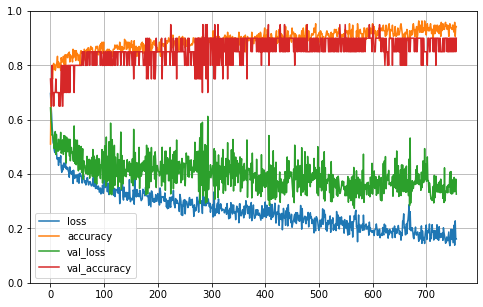

In [47]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_xlim(0,29)
plt.gca().set_ylim(0,1)
model.save('my_keras_model_aug_best.h5')

### Details about the model

In [48]:
model=keras.models.load_model('my_keras_model_aug_best.h5') 

model.summary()

for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(model.layers[i].get_config())
#info about optimizers
model.optimizer.get_config()      

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 62, 62, 32)        4640      
_________________________________________________________________
activation_15 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 64)      

{'name': 'Adam',
 'learning_rate': 6.3e-05,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

### Show the entire validation dataset

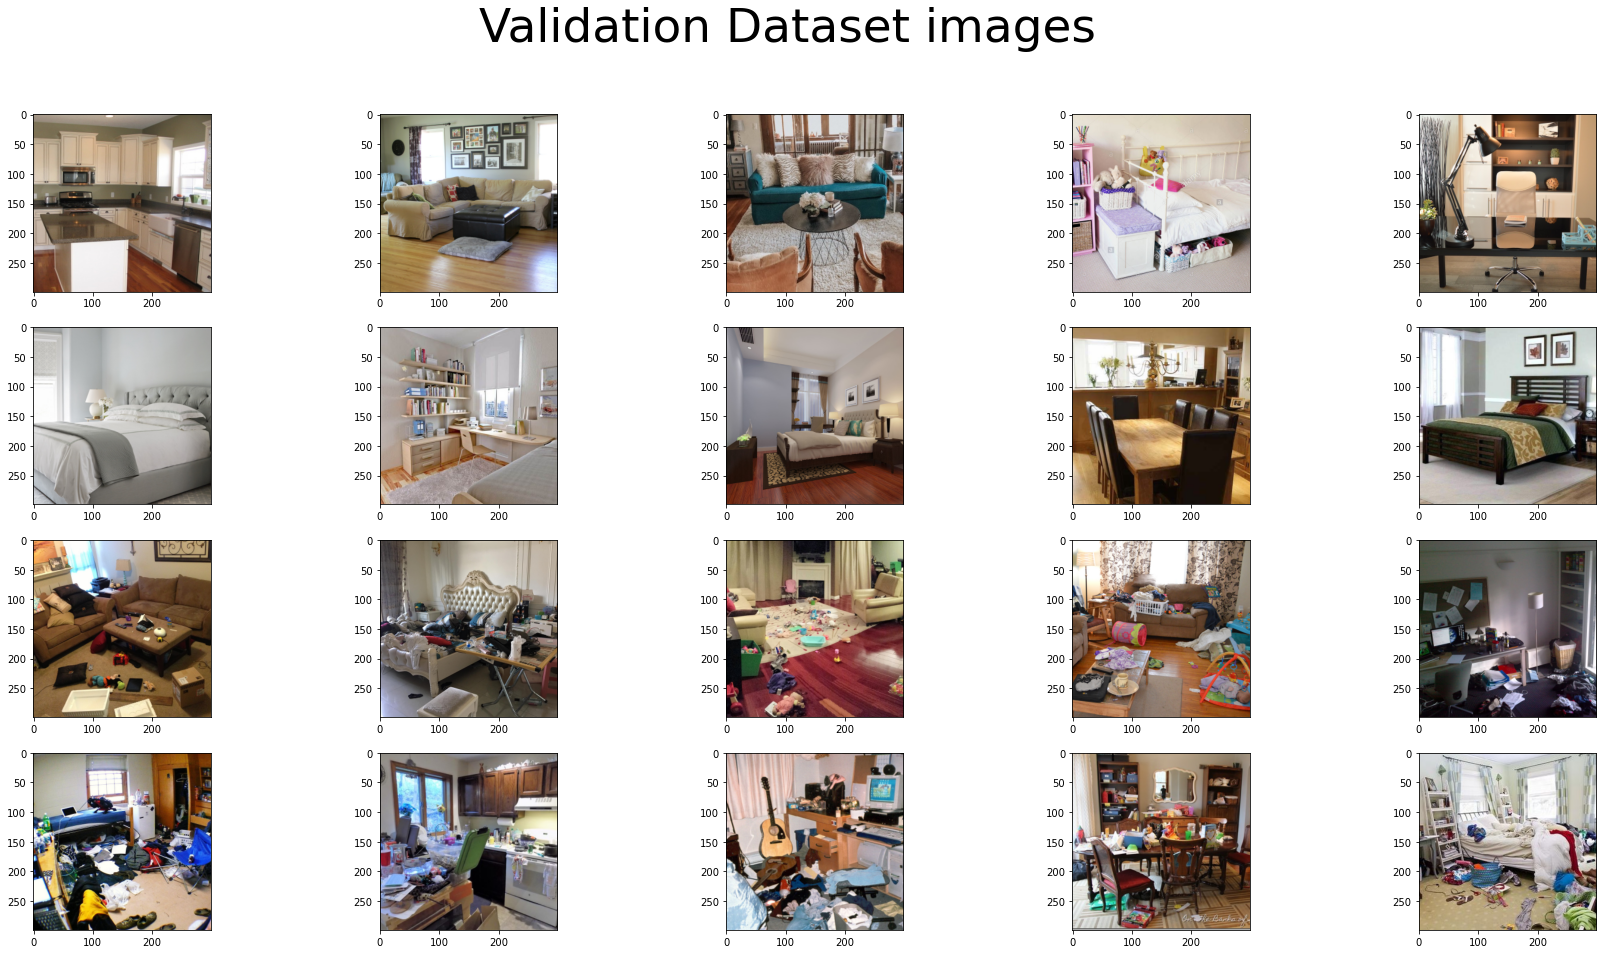

In [60]:
images=[] 
#paths=[]
n_classes=2
for i,filenames in enumerate(os.listdir(VALIDATION_DIR)): 
    #print(filenames)
    dir_fold=os.path.join(VALIDATION_DIR, filenames)
    #print(dir_fold)
    class_images=[]
    #print(os.listdir(filenames))
    for filename in os.listdir(dir_fold):
        img_path = os.path.join(dir_fold, filename)
        class_images.append(mpimg.imread(img_path))
    images.append(class_images)

#valid for balanced classes
columns = 5
fig,axes=plt.subplots(int(len(images)*len(images[0])/columns),columns,figsize=(30,15))
for i,ind in enumerate(images):
    fig.suptitle('Validation Dataset images',fontsize=47)
    for j, image in enumerate(ind):
        axes[int((i)*(len(ind)/columns)+(int(j/columns))),j % columns].imshow(image)

### Predict on test dataset

In [64]:
TEST_DIR = 'C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy'
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,batch_size=40,
                                                             classes=['test'],
                                                              # don't generate labels
                                                              class_mode=None,
                                                              # don't shuffle
                                                              shuffle=False,
                                                             target_size=(size,size))

Found 10 images belonging to 1 classes.


In [65]:
files=test_generator.filenames
files    

['test\\0.png',
 'test\\1.png',
 'test\\2.png',
 'test\\3.png',
 'test\\4.png',
 'test\\5.png',
 'test\\6.png',
 'test\\7.png',
 'test\\8.png',
 'test\\9.png']

In [66]:
#test_generator.reset()
pred=model.predict_classes(test_generator)
predicted_class_indices=np.array(pred).reshape(len(pred))
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results

C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Filename  Predictions
0  test\0.png  messy_train
1  test\1.png  clean_train
2  test\2.png  messy_train
3  test\3.png  messy_train
4  test\4.png  messy_train
5  test\5.png  messy_train
6  test\6.png  clean_train
7  test\7.png  messy_train
8  test\8.png  messy_train
9  test\9.png  clean_train

In [81]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Bonus: calculate the average pixel value for all the images in the dataset

#### Load the images with a dimension of 280x280 

In [203]:
train_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\train_dataset_280pix.csv")
val_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\val_dataset_280pix.csv")
test_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test_dataset_280pix.csv")

#### Preprocess the lists of pixels and calculate the average of every single pixel in the dataset

In [167]:
#really slow method to calculate the mean

list_of_red_pixels=[]
list_of_green_pixels=[]
list_of_blue_pixels=[]
a=time.time()
list_of_red_pixels=[]
for x in train_dataset['Red'].columns:
    if x<10:
        list_of_red_pixels.append(train_dataset['Red'][[x]].mean())
        #list_of_green_pixels.append(train_dataset['Green'].iloc[x])
        #list_of_blue_pixels.append(train_dataset['Blue'].iloc[x])
#plt.hist(list(flatten(train_dataset['Red']))) reduce a two-dimensional list in a one-dimensional one
b=time.time()
time=b-a
#list_of_red_pixels,time

In [168]:
#really quick method to calculate the mean (and std)
#a method to 
#calculate the mean in less than one second
mean_values_red=train_dataset['Red'][[x for x in train_dataset['Red'].columns]].mean()
mean_values_red_std=train_dataset['Red'][[x for x in train_dataset['Red'].columns]].std()
mean_values_green=train_dataset['Green'][[x for x in train_dataset['Green'].columns]].mean()
#calculate the std
mean_values_green_std=train_dataset['Green'][[x for x in train_dataset['Green'].columns]].std()
mean_values_blue=train_dataset['Blue'][[x for x in train_dataset['Blue'].columns]].mean()
mean_values_blue_std=train_dataset['Blue'][[x for x in train_dataset['Blue'].columns]].std()
#mean_values_red_std,mean_values_green_std,mean_values_blue_std

In [169]:
px=280
pixs=(px,px)
mean_values_red=pd.DataFrame(np.array(mean_values_red).reshape(pixs))
mean_values_blue=pd.DataFrame(np.array(mean_values_blue).reshape(pixs))
mean_values_green=pd.DataFrame(np.array(mean_values_green).reshape(pixs))

mean_values_red_std=pd.DataFrame(np.array(mean_values_red_std).reshape(pixs))
mean_values_blue_std=pd.DataFrame(np.array(mean_values_blue_std).reshape(pixs))
mean_values_green_std=pd.DataFrame(np.array(mean_values_green_std).reshape(pixs))


In [170]:

summed_image=[]
arrayz=np.zeros([px,px,3],dtype=np.uint8)
arrayz_std=np.zeros([px,px],dtype=np.uint8)
for index in mean_values_red.index.values:
    for column in mean_values_red.columns.values:
        arrayz[index,column]=[mean_values_red.iloc[index,column],
                              mean_values_blue.iloc[index,column],
                              mean_values_green.iloc[index,column]]
        arrayz_std[index,column]=statistics.mean([mean_values_red.iloc[index,column],
                              mean_values_blue.iloc[index,column],
                              mean_values_green.iloc[index,column]])

arrayz_std

array([[122, 123, 123, ..., 127, 127, 126],
       [125, 124, 124, ..., 125, 126, 126],
       [126, 126, 127, ..., 127, 127, 126],
       ...,
       [103, 101, 101, ..., 101, 101, 101],
       [101, 102, 103, ...,  96,  97,  98],
       [ 98,  98,  98, ...,  98,  97,  97]], dtype=uint8)

#### Final image of the average pixel values considering all the images in the train dataset

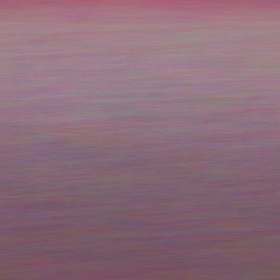

In [171]:
img_iris=Image.fromarray(arrayz)#.reshape((285,285)))
img_iris

#### Final image of the average red component considering all the images in the train dataset

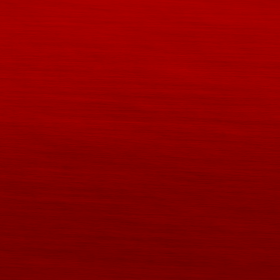

In [172]:
arrayz=np.zeros([px,px,3],dtype=np.uint8)
for index in mean_values_red.index.values:
    for column in mean_values_red.columns.values:
        arrayz[index,column]=[mean_values_red.iloc[index,column],
                              0,
                              0]
img_iris=Image.fromarray(arrayz)#.reshape((285,285)))
img_iris

#### Final image of the average blue component considering all the images in the train dataset

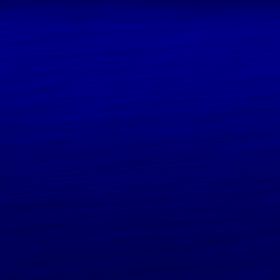

In [173]:
arrayz=np.zeros([px,px,3],dtype=np.uint8)
for index in mean_values_red.index.values:
    for column in mean_values_red.columns.values:
        arrayz[index,column]=[0,
                              0,
                              mean_values_blue.iloc[index,column]]

img_iris=Image.fromarray(arrayz)#.reshape((285,285)))
img_iris

#### Final image of the average green component considering all the images in the train dataset

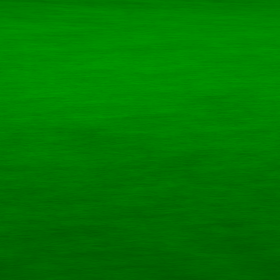

In [174]:

arrayz=np.zeros([px,px,3],dtype=np.uint8)
for index in mean_values_red.index.values:
    for column in mean_values_red.columns.values:
        arrayz[index,column]=[0,
                              mean_values_green.iloc[index,column],
                              0]

img_iris=Image.fromarray(arrayz)#.reshape((285,285)))
img_iris

#### Enhanced figures with Matplotlib

Text(0.5, 1.0, 'Green in the train dataset')

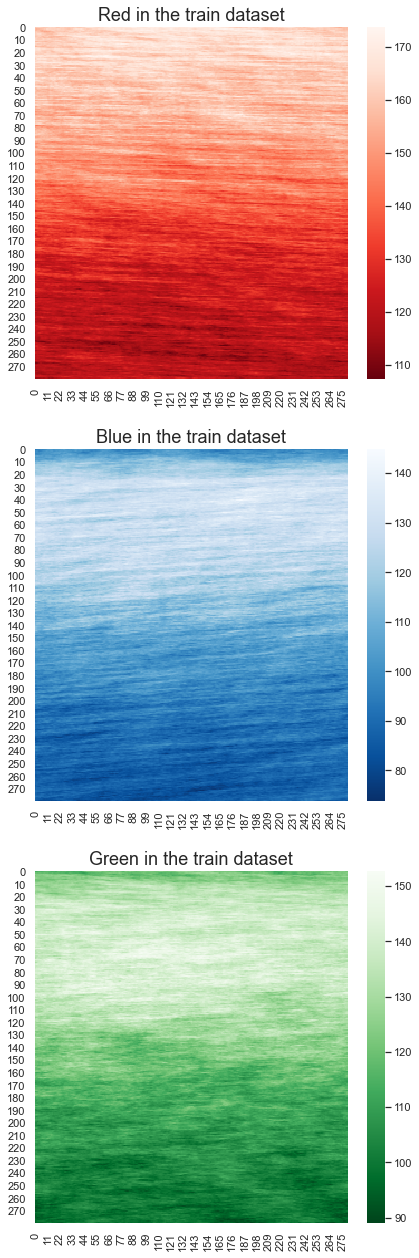

In [175]:

size=7
fig=plt.figure(figsize=(size,22))

ax1=fig.add_subplot(3,1,1)
palette=plt.get_cmap('Reds').reversed()
sns.heatmap(mean_values_red,cmap=palette)
#ax2.rcParams['axes.titlepad']=6
#sns.set(rc={'figure.figsize':(20,20)})
ax1.set_title('Red component in the train dataset',{'fontsize': 18})


ax2=fig.add_subplot(3,1,2)
palette=plt.get_cmap('Blues').reversed()
sns.heatmap(mean_values_blue,cmap=palette)
#ax2.rcParams['axes.titlepad']=6
sns.set(rc={'figure.figsize':(20,20)})
ax2.set_title('Blue component in the train dataset',{'fontsize': 18})
#xlabel('size')

ax3=fig.add_subplot(3,1,3)
palette=plt.get_cmap('Greens').reversed()
sns.heatmap(mean_values_green,cmap=palette)
#ax3.rcParams['axes.titlepad']=6
ax3.set_title('Green component in the train dataset',{'fontsize': 18})
#xlabel('size')

#### Plot of standard deviation of each pixel value considering all the images in the train dataset

Text(0.5, 1.0, 'Standard deviation')

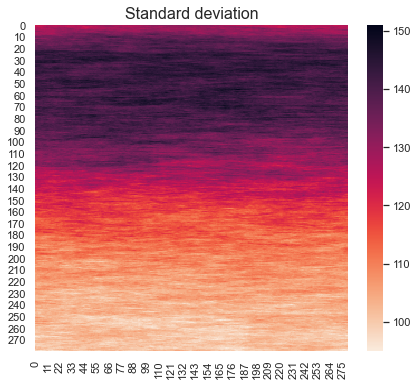

In [184]:

fig=plt.figure(figsize=(size,size-1))

ax1=fig.add_subplot(1,1,1)

sns.heatmap(arrayz_std,cmap='rocket_r')
ax1.set_title('Standard deviation',{'fontsize': 16})
#ax1.set_rcParams['axes.titlepad']=6